In [48]:
import pandas as pd
import vectorbtpro as vbt
import cta_filter
import warnings

warnings.filterwarnings("ignore")
vbt.settings.set_theme("dark")
vbt.settings['plotting']['layout']['width'] = 1200
print(cta_filter.__all__)


def get_data():
    df = pd.read_csv('data.csv',parse_dates=['Open time'])
    df['t'] = df['Open time'].astype(int)//10**6
    df[['dt','t','o','h','l','c','v']] = df[['Open time','t','Open','High','Low','Close','Volume']]
    return df[['dt','t','o','h','l','c','v']]


['sum_as_string', 'rsi', 'atr', 'filter1']


In [29]:
data = get_data()
data

,dt,t,o,h,l,c,v
0,2022-01-01 00:00:00+00:00,1640995200000,46210.57,46265.41,46210.55,46246.66,253.757
1,2022-01-01 00:01:00+00:00,1640995260000,46246.66,46335.17,46235.80,46314.36,275.296
2,2022-01-01 00:02:00+00:00,1640995320000,46311.81,46385.40,46283.01,46367.54,304.721
3,2022-01-01 00:03:00+00:00,1640995380000,46367.54,46390.83,46305.61,46328.00,182.410
4,2022-01-01 00:04:00+00:00,1640995440000,46327.99,46332.59,46292.18,46316.17,64.906
...,...,...,...,...,...,...,...
1533595,2024-11-30 23:55:00+00:00,1733010900000,96513.40,96513.40,96425.60,96430.50,48.511
1533596,2024-11-30 23:56:00+00:00,1733010960000,96430.50,96468.00,96408.40,96468.00,58.872
1533597,2024-11-30 23:57:00+00:00,1733011020000,96467.90,96488.20,96450.00,96450.10,24.365
1533598,2024-11-30 23:58:00+00:00,1733011080000,96450.10,96450.10,96442.70,96444.70,27.585


In [56]:
def test_filter(n=0):
    data = get_data()
    data = data[-365*24*60:]
    data.reset_index(drop=True, inplace=True)
    data['dir'] = pd.DataFrame(cta_filter.filter1(data['h'],data['l'],data['c'],100,10))
    pf = vbt.Portfolio.from_signals(
        data['c'],
        long_entries=data['dir']>0, 
        long_exits=data['dir']<0,
        init_cash=100,
        fees=0.001,
        freq='1min',
        # sl_stop=0.1,
        # tsl_stop=0.1,
    )
    return pf
pf = test_filter(0)
print(pf.stats())

Start                                                 0
End                                              525599
Period                                365 days 00:00:00
Start Value                                       100.0
Min Value                                     98.986244
Max Value                                    236.347148
End Value                                    228.917166
Total Return [%]                             128.917166
Benchmark Return [%]                         149.473385
Total Time Exposure [%]                       58.510845
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              26.278724
Max Drawdown Duration                  91 days 13:16:00
Total Orders                                         37
Total Fees Paid                                5.031471
Total Trades                                         19
Win Rate [%]                                  72.222222
Best Trade [%]                                18

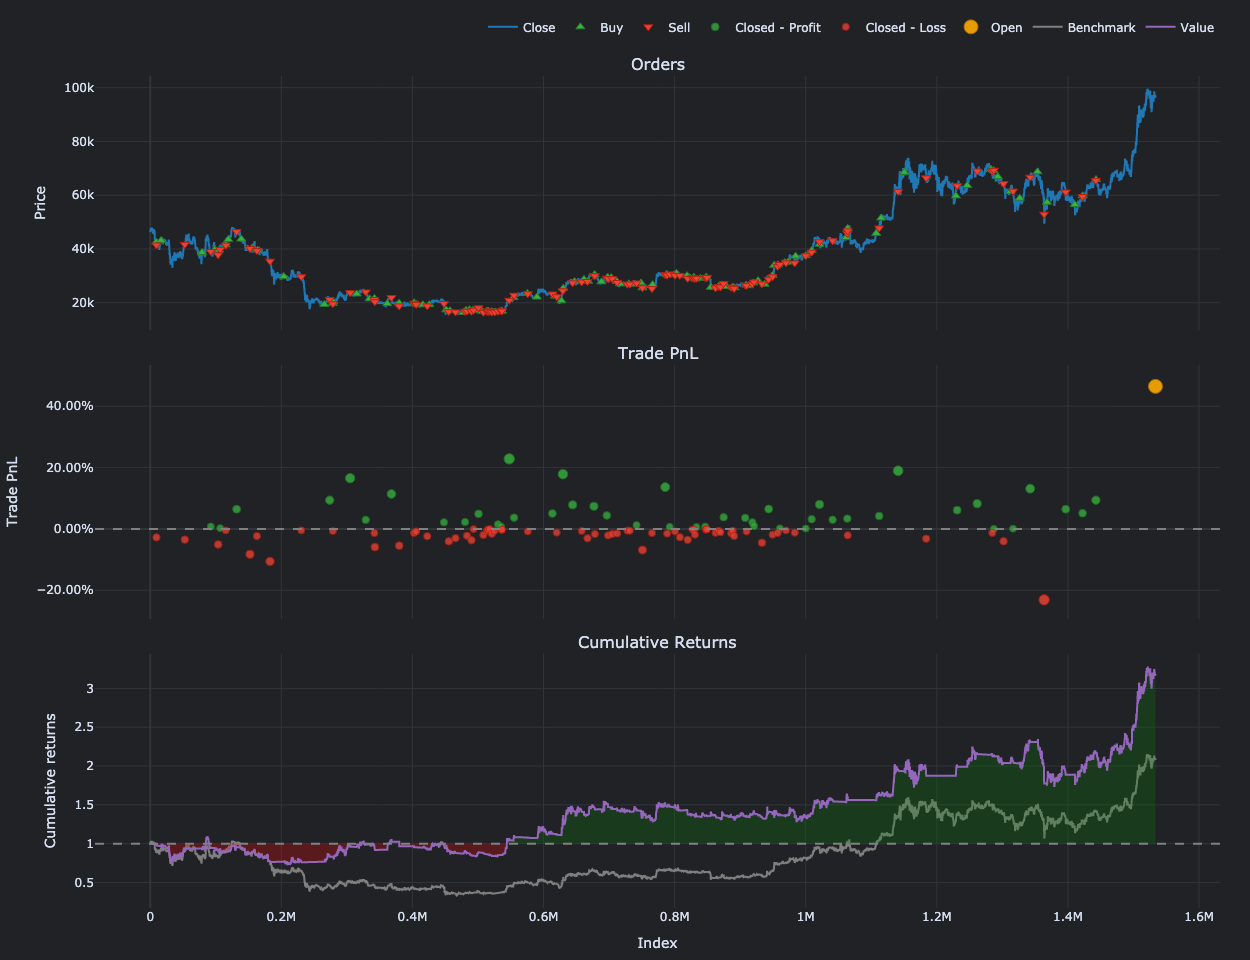

In [54]:
pf.plot().show_png()

In [60]:
pd.DataFrame(pf.order_records)

,id,col,signal_idx,creation_idx,idx,size,price,fees,side,type,stop_type
0,0,0,1148,1148,1148,0.002534,39430.7,0.099900,0,0,-1
1,1,0,13087,13087,13087,0.002534,42659.6,0.108081,1,0,-1
2,2,0,13094,13094,13094,0.002585,41725.9,0.107865,0,0,-1
3,3,0,33014,33014,33014,0.002585,43058.8,0.111310,1,0,-1
4,4,0,53661,53661,53661,0.002512,44231.1,0.111088,0,0,-1
5,5,0,55496,55496,55496,0.002512,45806.2,0.115044,1,0,-1
6,6,0,55991,55991,55991,0.002410,47637.0,0.114814,0,0,-1
7,7,0,55995,55995,55995,0.002410,46737.9,0.112647,1,0,-1
8,8,0,99498,99498,99498,0.002454,45804.7,0.112422,0,0,-1
9,9,0,104087,104087,104087,0.002454,47824.2,0.117379,1,0,-1
